<a id = "table-of-contents"></a>
# Table of Contents

- [1 Introduction](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 The Goal](#1.2)
    - [1.3 Data Dictionary](#1.3)
- [2 Preparations](#2)
    - [2.1 Importing Packages](#2.1)
    - [2.2 Loading The Dataset](#2.2)
- [3 Hypothesis Generation](#3)
- [4 Getting Basic Understanding of The Data](#4)
    - [4.1 Seeing the data and shape](#4.1)
    - [4.2 Statistics](#4.2)
    - [4.3 Number of Unique Values in Each Column](#4.3)
    - [4.4 Distribution of target Variable](#4.4)
    - [4.5 Observations](#4.5)
- [5 Univariate Analysis](#5)
    - [5.1 Distribution of Continuous Variables](#5.1)
    - [5.2 Distribution of Categorical Variables](#5.2)
    - [5.3 Univariate Analysis Observations](#5.3)
- [6 Bivariate Analysis](#6)
    - [6.1 Distribution of Target w.r.t. Continuous Variables](#6.1)
    - [6.2 Distribution of Target w.r.t. Categorical Variables](#6.2)
    - [6.3 Popular Premiums w.r.t. Different Health Condition](#6.3)
    - [6.4 Observations From Bivariate Analysis](#6.4)
- [7 Hypothesis Testing](#7)
- [8 Conclusion From Data Analysis](#8)
- [9 Machine Learning](#9)
    - [9.1 Data Preprocessing](#9.1)
    - [9.2 Baseline Model Building](#9.2)
    - [9.3 Setting Up a Cross-Validation Strategy](#9.4)
    - [9.4 Validating ML Models](#9.4)
    - [9.5 Aggregating Feature Importances of All ML Models.](#9.5)
    - [9.6 Conclusion From Machine Learning Modeling](#9.6)


<a id="1"></a>
# 1. Introduction


Data Analysis is basically a process of cleaning, transforming, and modeling the data to extract useful insights to make data-driven decisions. Data Analysis is the first step to be completed after getting data from a Data Science project. 





<a id="1.1"></a>
### 1. 1 Problem Statement
The given data set contains a user's medical history in the form of whether they have a specific condition or not, their age, height, weight, etc along with the premium they have to pay in INR for insurance. Perform an exploratory data analysis to determine what factors play an important role in determining the premium of the user. 

<img
 src="https://thesecondangle.com/tsa-content/uploads/2020/06/healthcare_consumer-e1478497357270.jpg" width = 500>

<a id="1.2"></a>
### 1.2 The Goal
Our goal is to find out what are the factors that have a significant effect when it comes to determining the premium of the User, using Data Analysis methods like Data Visualizations, Statistical Modeling, etc. 

<a id = "1.3"></a>
### 1.3 Data Dictionary

As no official data definition has been provided, a guess of data definition has been performed.

- Age : Age of the user.
- Diabetes : Does the user have Diabetes condition?
- BloodPressureProblems : Does the user have a Blood Pressure Problem?
- AnyTransplants : Has user gone through any transplnat surgery before?
- AnyChronicDiseases : Does the user have any Chronic disease?
- Height : Height of the user.
- Weight : Weight of the user. 
- KnownAllergies : Does the user have any Allergies?
- HistoryOfCancerInFamily : Does the user have a Cancer history in the family?
- NumberOfMajorSurgeries : Number of major surgeries you have gone through. 
- PremiumPrice : Price of user's premium. (We can also refer to this as a Target variable.)

---

<a id="2"></a>
# 2. Preparations

Importing packages and loading the data that will be used in the analysis process. Packages that will be loaded are mainly for data manipulation and data visualization. 

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

<a id="2.1"></a>


### 2.1 Importing Packages

In [1]:
#### Data Manipulation
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

#### Data Visulization 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import ticker
import seaborn as sns
sns.set(style = 'white')

############## Libraries for Machine Learning Modeling ###############

# Model Building
from sklearn.model_selection import train_test_split, KFold

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score


<a id = "2.2"></a>

### 2.2 Loading The Dataset

In [2]:
data = pd.read_csv(r"C:\Users\omkar\Downloads\Medicalpremium.xls")

---
<a id = "3"></a>

# 3. Hypothesis Generation

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

Hypothesis generation is an educated “guess” of various factors that are impacting the business problem that needs to be solved using machine learning. In framing a hypothesis, the data scientist must not know the outcome of the hypothesis that has been generated based on any evidence.

The first step towards problem-solving in data science projects. This is the step where we combine our problem-solving skills with our business intuition. It’s a truly crucial step in ensuring a successful data science project.

- **Hypothesis**
1. Older users will have higher Premium_Price.
2. Users with any health condition will have higher PremiumPrice. 
3. More the number of health conditions, more the PremiumPrice. 
4. Users with lower or higher BMI will have higher PremiumPrice. 

---

---
<a id = '4'></a>
# 4. Getting Basic Understanding of The Dataset

[back to top](#table-of-contents)
<a id="table-of-contents"></a>


<a id = "4.1"></a>
### 4.1 Seeing the data and shape

In [3]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
print(f"Shape of the Dataset is: {data.shape}")
print(f"The Dataset has {len(data.columns) - 1} features and 1 target variable: {data.columns[-1]}")

target = 'PremiumPrice'

Shape of the Dataset is: (986, 11)
The Dataset has 10 features and 1 target variable: PremiumPrice


<a id = "4.2"></a>

### 4.2 Statistics

In [5]:
data.describe().T.style.bar(color = '#eeb977').background_gradient(subset = ['std', '50%'], cmap='Reds', axis = 1)

,count,mean,std,min,25%,50%,75%,max
Age,986.000000,41.745436,13.963371,18.000000,30.000000,42.000000,53.000000,66.000000
Diabetes,986.000000,0.419878,0.493789,0.000000,0.000000,0.000000,1.000000,1.000000
BloodPressureProblems,986.000000,0.468560,0.499264,0.000000,0.000000,0.000000,1.000000,1.000000
AnyTransplants,986.000000,0.055781,0.229615,0.000000,0.000000,0.000000,0.000000,1.000000
AnyChronicDiseases,986.000000,0.180527,0.384821,0.000000,0.000000,0.000000,0.000000,1.000000
Height,986.000000,168.182556,10.098155,145.000000,161.000000,168.000000,176.000000,188.000000
Weight,986.000000,76.950304,14.265096,51.000000,67.000000,75.000000,87.000000,132.000000
KnownAllergies,986.000000,0.215010,0.411038,0.000000,0.000000,0.000000,0.000000,1.000000
HistoryOfCancerInFamily,986.000000,0.117647,0.322353,0.000000,0.000000,0.000000,0.000000,1.000000
NumberOfMajorSurgeries,986.000000,0.667343,0.749205,0.000000,0.000000,1.000000,1.000000,3.000000


<a id = "4.3"></a>
### 4.3 Number of Unique Values in Each Columns

In [6]:
pd.DataFrame(data.nunique(), columns=['No. of Unique Values']).sort_values(by = 'No. of Unique Values').style.bar(color = '#eeb977').background_gradient(cmap = 'Reds', axis =1)

,No. of Unique Values
Diabetes,2
BloodPressureProblems,2
AnyTransplants,2
AnyChronicDiseases,2
KnownAllergies,2
HistoryOfCancerInFamily,2
NumberOfMajorSurgeries,4
PremiumPrice,24
Height,44
Age,49


<a id = "4.4"></a>

### 4.4 Distribution of Target variable

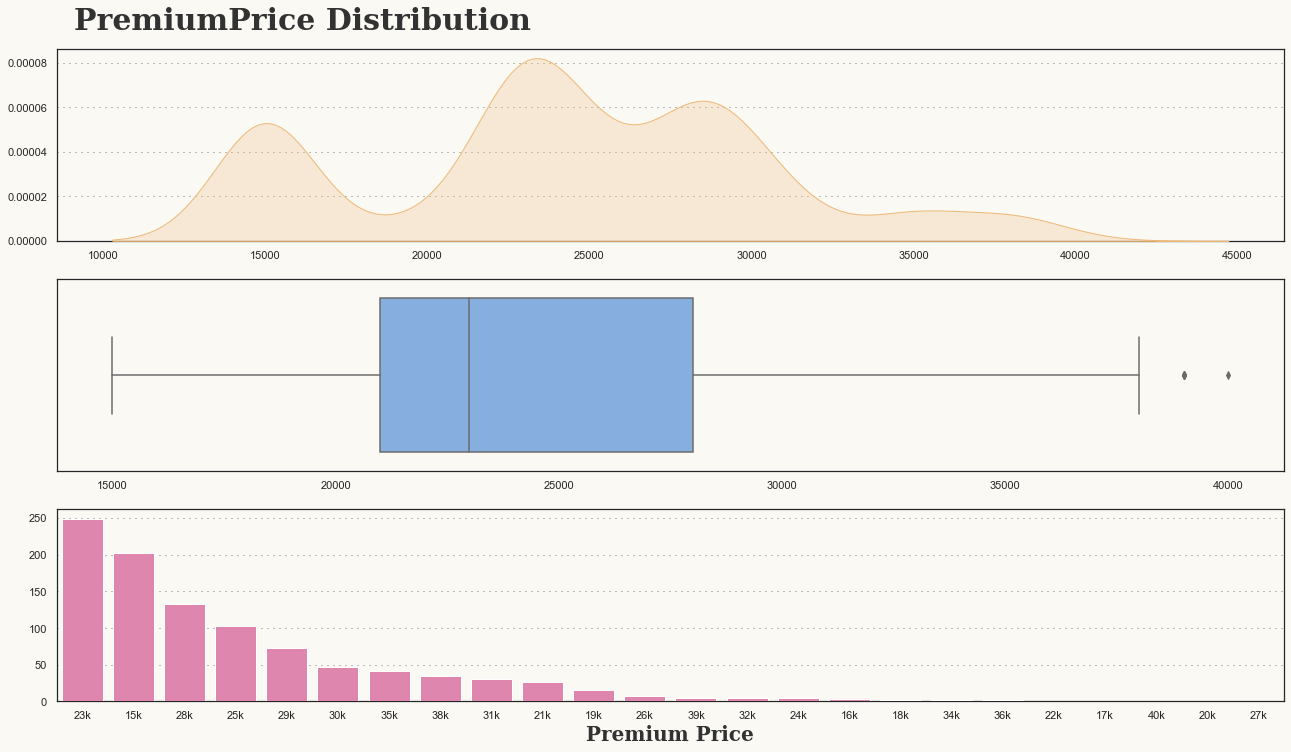

In [7]:
fig = plt.figure(figsize=(22, 12))
gs = fig.add_gridspec(3, 1)

background_color = "#faf9f4"
color_palette = ["#8d9e8c", "#eeb977"]

# Fig 1
ax0 = fig.add_subplot(gs[0, 0])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)


ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(data["PremiumPrice"], color="#eeb977", shade=True, ax=ax0, zorder=3)
plt.ticklabel_format(style='plain')
ax0.set_xlabel("")
ax0.set_ylabel("")

# Fig 2
ax1 = fig.add_subplot(gs[1, 0])

fig.patch.set_facecolor(background_color)
ax1.set_facecolor(background_color)

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(data["PremiumPrice"], color="#77acee", ax=ax1, zorder=3)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Fig 3

data['dummy_target'] = data[target].apply(lambda x: str(x)[:2] + 'k')
ax2 = fig.add_subplot(gs[2, 0])
fig.patch.set_facecolor(background_color)
ax2.set_facecolor(background_color)

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(data['dummy_target'], order = data['dummy_target'].value_counts().index, color="#ee77ac", ax=ax2, zorder=3)
data.drop('dummy_target', axis = 1, inplace=True)
ax2.set_xlabel("Premium Price", fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax2.set_ylabel("")

_ = plt.title('PremiumPrice Distribution',fontsize=30, y = 3.47, x = 0.2, fontweight='bold', fontfamily='serif', color="#323232")

<a id = '4.5'></a>
### 4.5 Observations

- There are 986 rows with 11 columns.
- Dataset has 6 binary variables, 1 Discrete Variable, and 4 Continuous Variables including Target. 
- The average Premium is 24336 with the lowest is 15000 and the highest is 40000. 
- Premium has 24 different prices with the most occurred premium of 23000. Some more popular premiums are of price 15000, 28000, 25000, 29000.
- Some Premium prices occurred only once. i.e. 40000, 17000, 20000, 22000, 27000.

---
<a id = '5'></a>
# 5. Univariate Analysis

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

In [8]:
# Seperating Numerical and Categorical Features
num_cols = ['Age', 'Height', 'Weight']
cat_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases','KnownAllergies',
            'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

<a id = '5.1'></a>
### 5.1 Distribution of Continuous Variables

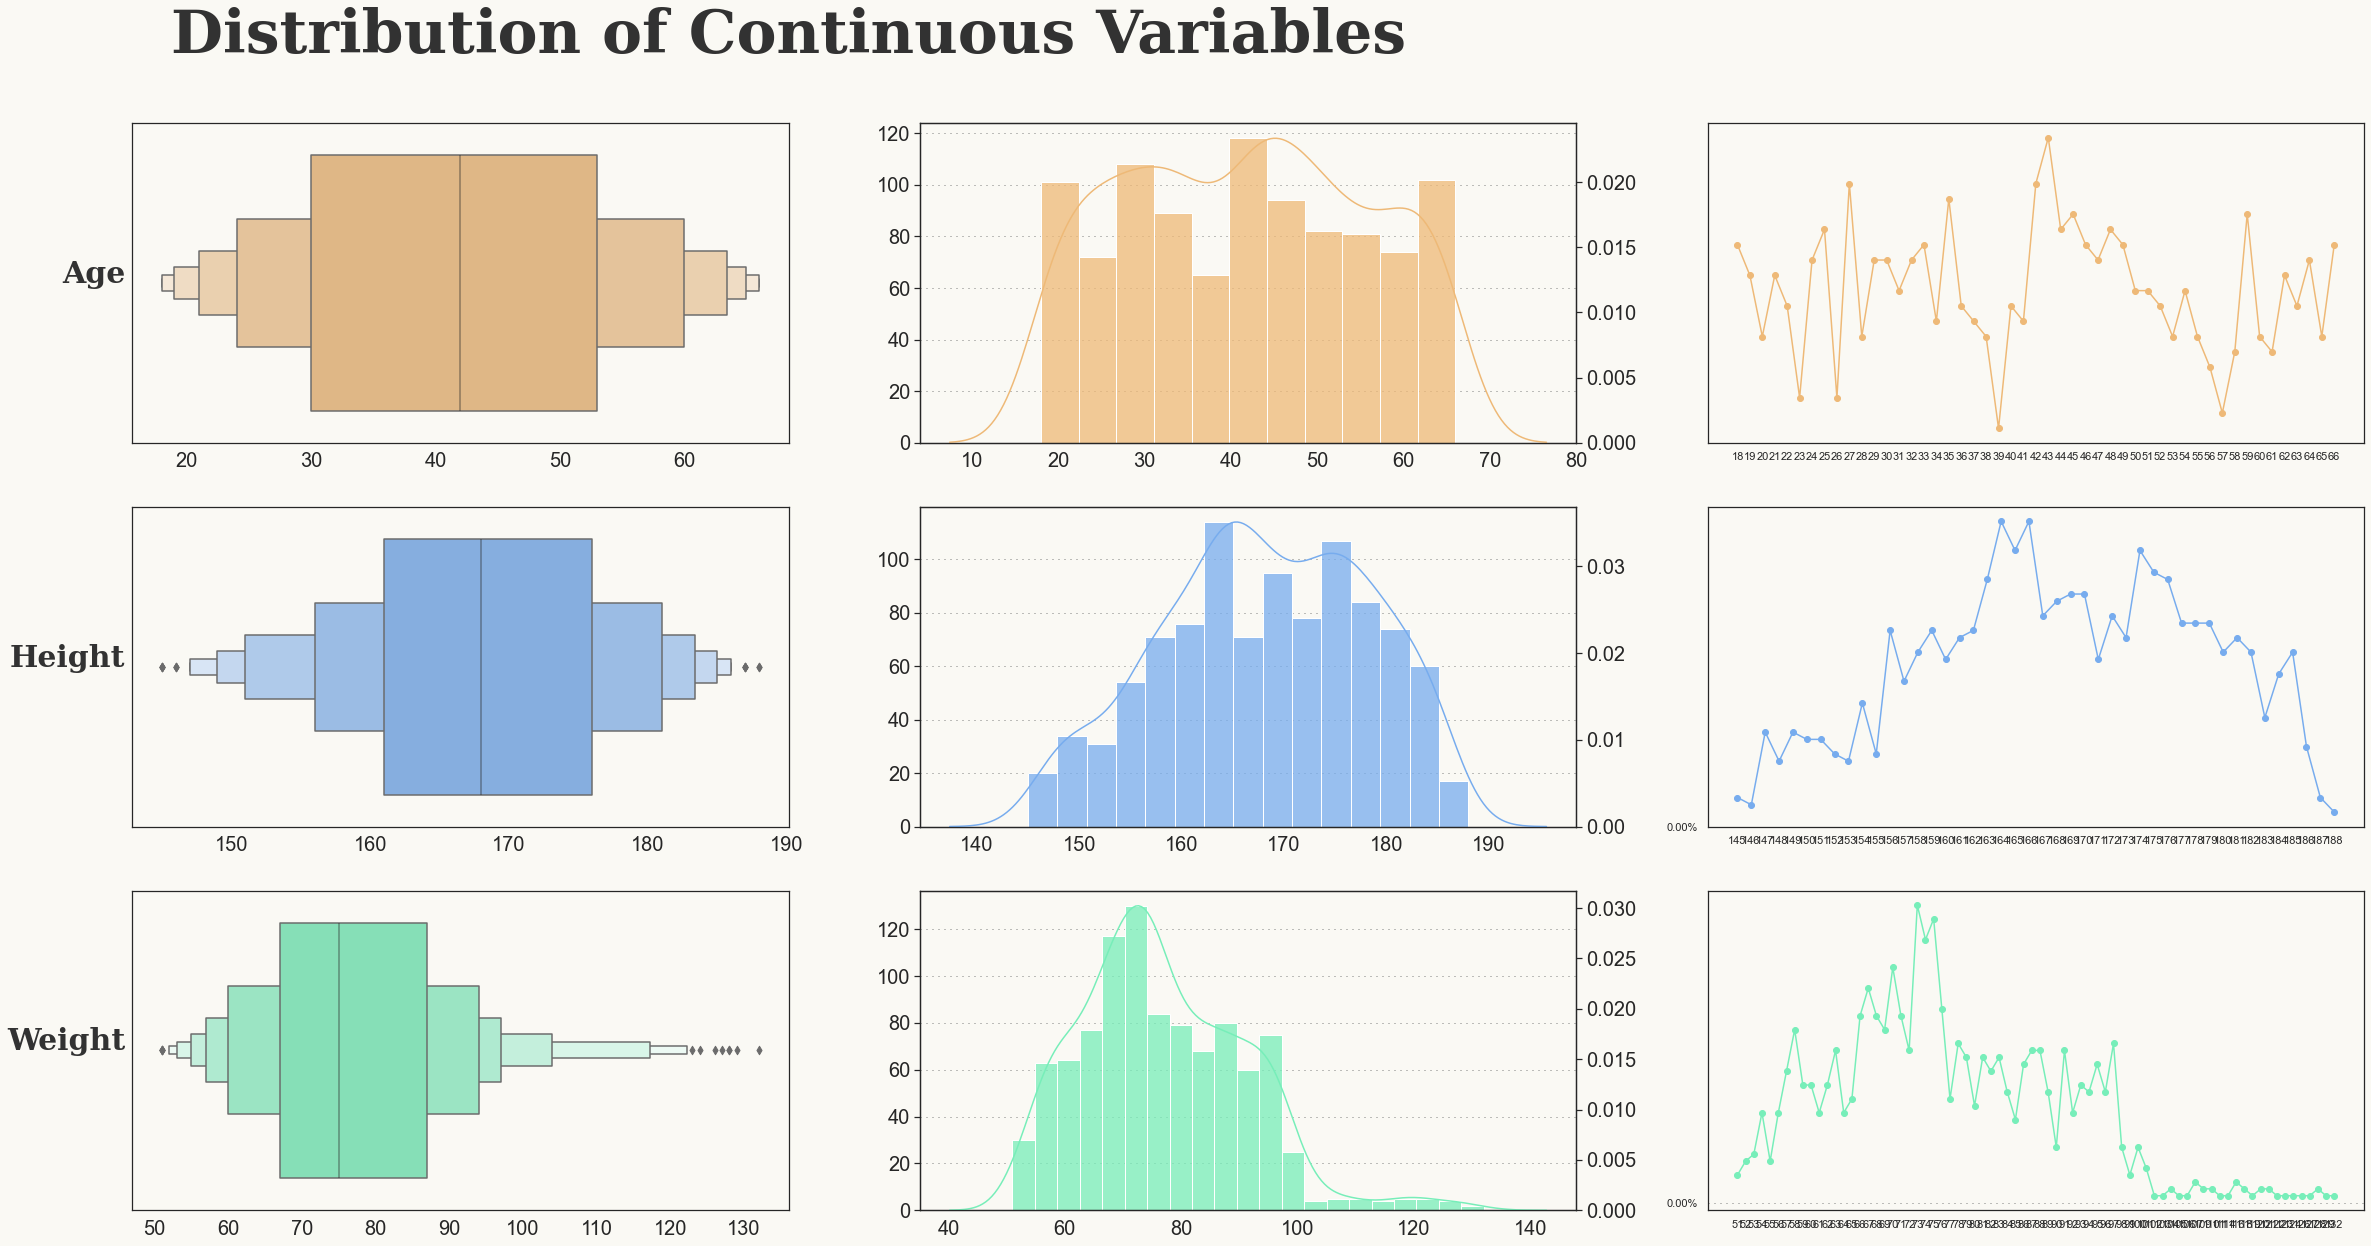

In [9]:
fig = plt.figure(figsize = (40, 20))
gs = fig.add_gridspec(3, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color
ax7.set_facecolor(background_color) # axes background color
ax8.set_facecolor(background_color) # axes background color


# _ = plt.title('Distribution of Continuous Variables',fontsize=30, y = 1.1, x = 0.2, fontweight='bold', fontfamily='serif', color="#323232")


#### Age ####

# Ax0

ax0.text(10, 0, 'Age', fontsize = 30, fontweight='bold', fontfamily='serif', color='#323232')
sns.boxenplot(ax = ax0, x='Age', data = data, color='#eeb977')
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.tick_params(labelsize=20)

# Ax1
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax = ax1, x='Age', data = data, color='#eeb977')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.tick_params(labelsize=20)
ax1 = ax1.twinx()
sns.kdeplot(ax = ax1, x='Age', data = data, color='#eeb977')
ax1.set_xlabel("")
ax1.set_ylabel("")
plt.ticklabel_format(style='plain')
ax1.tick_params(labelsize=20)


# Ax2

temp = pd.DataFrame(data['Age'].value_counts())
temp['Percentage'] = temp["Age"].apply(lambda x: x/sum(temp['Age']) * 100)
temp = temp.sort_index()

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.plot(np.arange(len(temp.index)), temp["Percentage"], zorder=3, color="#eeb977", marker='o')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(20))
_ = ax2.set_xticks(np.arange(len(temp.index)))
_ = ax2.set_xticklabels(list(temp.index))


#### Height ####

# Ax3

ax3.text(134, 0, 'Height', fontsize = 30, fontweight='bold', fontfamily='serif', color='#323232')
sns.boxenplot(ax = ax3, x='Height', data = data, color='#77acee')
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.tick_params(labelsize=20)

# Ax4
ax4.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax = ax4, x='Height', data = data, color='#77acee')
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.tick_params(labelsize=20)
ax4 = ax4.twinx()
sns.kdeplot(ax = ax4, x='Height', data = data, color='#77acee')
ax4.set_xlabel("")
ax4.set_ylabel("")
plt.ticklabel_format(style='plain')
ax4.tick_params(labelsize=20)


# Ax5

temp = pd.DataFrame(data['Height'].value_counts())
temp['Percentage'] = temp["Height"].apply(lambda x: x/sum(temp['Height']) * 100)
temp = temp.sort_index()

ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.plot(np.arange(len(temp.index)), temp["Percentage"], zorder=3, color="#77acee", marker='o')
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(20))
_ = ax5.set_xticks(np.arange(len(temp.index)))
_ = ax5.set_xticklabels(list(temp.index))

#### Weight ####

# Ax6

ax6.text(30, 0, 'Weight', fontsize = 30, fontweight='bold', fontfamily='serif', color='#323232')
sns.boxenplot(ax = ax6, x='Weight', data = data, color='#77eeb9')
ax6.set_xlabel("")
ax6.set_ylabel("")
ax6.tick_params(labelsize=20)

# Ax7
ax7.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax = ax7, x='Weight', data = data, color='#77eeb9')
ax7.set_xlabel("")
ax7.set_ylabel("")
ax7.tick_params(labelsize=20)
ax7 = ax7.twinx()
sns.kdeplot(ax = ax7, x='Weight', data = data, color='#77eeb9')
ax7.set_xlabel("")
ax7.set_ylabel("")
plt.ticklabel_format(style='plain')
ax7.tick_params(labelsize=20)


# Ax8

temp = pd.DataFrame(data['Weight'].value_counts())
temp['Percentage'] = temp["Weight"].apply(lambda x: x/sum(temp['Weight']) * 100)
temp = temp.sort_index()

ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.plot(np.arange(len(temp.index)), temp["Percentage"], zorder=3, color="#77eeb9", marker='o')
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
_ = ax8.set_xticks(np.arange(len(temp.index)))
_ = ax8.set_xticklabels(list(temp.index))

_ = plt.title('Distribution of Continuous Variables',fontsize=60, y = 3.6, x = -0.2, fontweight='bold', fontfamily='serif', color="#323232")


<a id = '5.2'></a>
### 5.2 Distribution of Categorical Variables

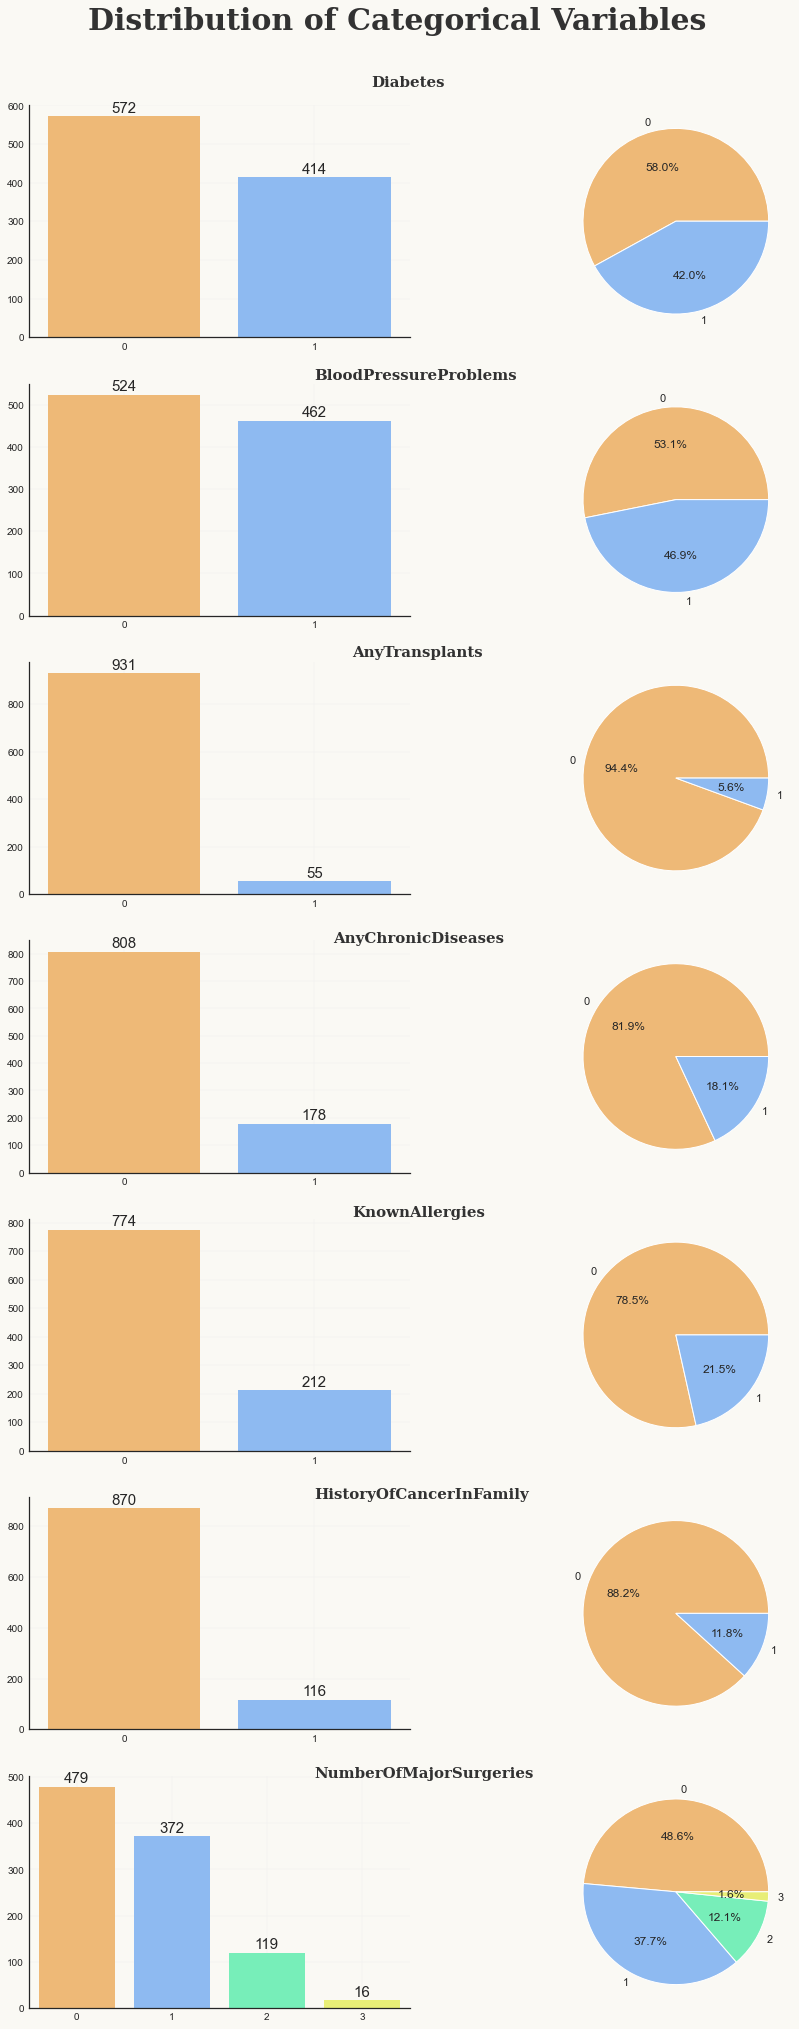

In [10]:
color_palette = ["#eeb977","#8d9e8c"]

fig = plt.figure(figsize = (15, 35))
gs = fig.add_gridspec(7, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])
ax10 = fig.add_subplot(gs[5, 0])
ax11 = fig.add_subplot(gs[5, 1])
ax12 = fig.add_subplot(gs[6, 0])
ax13 = fig.add_subplot(gs[6, 1])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color
ax7.set_facecolor(background_color) # axes background color
ax8.set_facecolor(background_color) # axes background color
ax9.set_facecolor(background_color) # axes background color
ax10.set_facecolor(background_color) # axes background color
ax11.set_facecolor(background_color) # axes background color
ax12.set_facecolor(background_color) # axes background color
ax13.set_facecolor(background_color) # axes background color


for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)
    ax9.spines[s].set_visible(False)
    ax10.spines[s].set_visible(False)
    ax11.spines[s].set_visible(False)
    ax12.spines[s].set_visible(False)
    ax13.spines[s].set_visible(False)

axis = { 'Diabetes' : [ax0, ax1],
         'BloodPressureProblems' : [ax2, ax3],
         'AnyTransplants' : [ax4, ax5],
         'AnyChronicDiseases' : [ax6, ax7],
         'KnownAllergies' : [ax8, ax9],
         'HistoryOfCancerInFamily' : [ax10, ax11],
         'NumberOfMajorSurgeries' : [ax12, ax13]
       }

for col in axis.keys():
    temp = pd.DataFrame(data[col].value_counts())
    temp = temp.reset_index(drop=False)
    temp.columns = ['Number', 'Count']
    

    #sns.barplot(ax = axis[col][0], x = temp['Number'], y = temp['Count']/len(data)*100, zorder=2, linewidth=0, alpha=1, saturation=1)
    if col == 'NumberOfMajorSurgeries':
        sns.countplot(ax = axis[col][0], data = data, x = col, zorder=2, linewidth=0, alpha=1, saturation=1, palette=["#eeb977","#8ebaf1", "#77eeb9", "#e8ee77"])
    else:
        sns.countplot(ax = axis[col][0], data = data, x = col, zorder=2, linewidth=0, alpha=1, saturation=1, palette=["#eeb977","#8ebaf1"])
    axis[col][0].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    axis[col][0].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    axis[col][0].set_ylabel('')
    axis[col][0].set_xlabel('')
    axis[col][0].tick_params(labelsize=10, width=0.5, length=1.5)
    #axis[col][0].yaxis.set_major_formatter(ticker.PercentFormatter())
    
    
    for p in axis[col][0].patches:
        percentage = f'{p.get_height()}\n'
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        axis[col][0].text(x, y, percentage, ha='center', va='center', fontsize = 15)
    
    # Pie Plot
    if col == 'NumberOfMajorSurgeries':
        data[col].value_counts().plot.pie(autopct='%1.1f%%', colors = ["#eeb977","#8ebaf1", "#77eeb9", "#e8ee77"], ax = axis[col][1])
    else:
        data[col].value_counts().plot.pie(autopct='%1.1f%%', colors = ["#eeb977","#8ebaf1"], ax = axis[col][1])
    axis[col][1].set_ylabel('')
    axis[col][1].set_xlabel('')
    
_ = ax0.text(1.3, 650, 'Diabetes', fontsize = 15, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax2.text(1, 560, 'BloodPressureProblems', fontsize = 15, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax4.text(1.2, 1000, 'AnyTransplants', fontsize = 15, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax6.text(1.1, 840, 'AnyChronicDiseases', fontsize = 15, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax8.text(1.2, 820, 'KnownAllergies', fontsize = 15, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax10.text(1, 910, 'HistoryOfCancerInFamily', fontsize = 15, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax12.text(2.5, 500, 'NumberOfMajorSurgeries', fontsize = 15, fontweight='bold', fontfamily='serif', color='#323232')

_ = plt.title('Distribution of Categorical Variables',fontsize=30, y = 8.5, x = -0.7, fontweight='bold', fontfamily='serif', color="#323232")

<a id='5.3'></a>
### 5.3 Univariate Analysis Observations

**Continuos**
- Age is distributed almost equally. 
- Most of the users have heights of between 165 to 175.
- The Weight column has some outliers in it. 

**Categorical**
- 42% of users have diabetes. 
- Almost half of users (46.9%) have Blood Pressure Problems. 
- Very few (5.6%) users have gone through any Transplant surgery.
- 18.1% of users have a chronic disease. 
- 21% of users have known allergies.
- 11.8% of users have a history of cancer in their family. 
- Almost half of the users have never had major surgery. 37% of users had 1 major surgery. 

---
<a id = '6'></a>
# 6. Bivariate Analysis

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

<a id = 6.1></a>
### 6.1 Distribution of Target w.r.t. Continuous Variables

**Scatterplot**

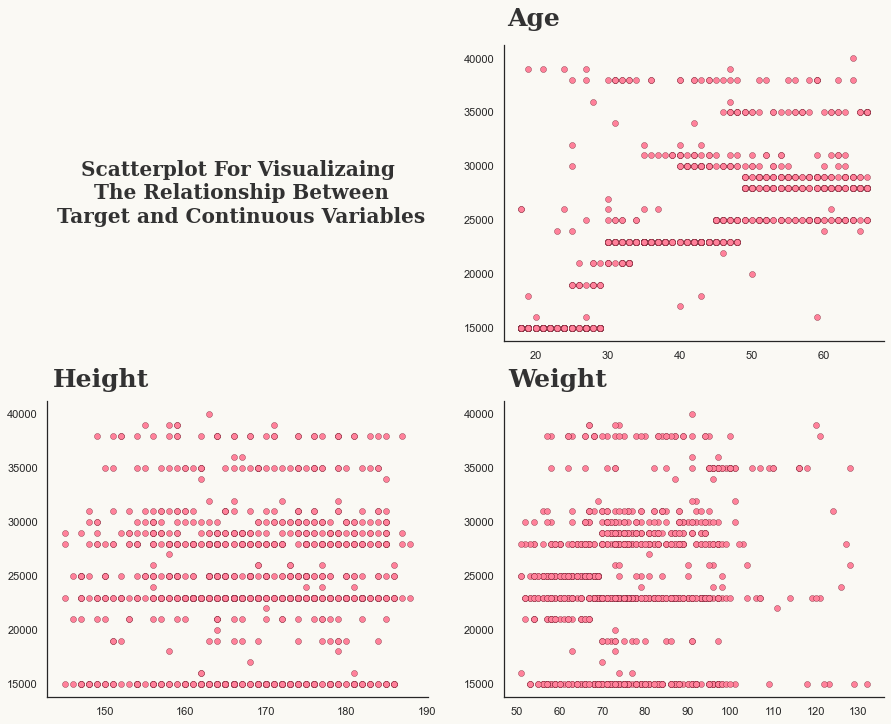

In [11]:
fig = plt.figure(figsize = (15, 12))
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])


background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color

for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

axis = { 'Age' : [ax1],
         'Height' : [ax2],
         'Weight' : [ax3],
       }

ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, 'Scatterplot For Visualizaing\n The Relationship Between\n Target and Continuous Variables', horizontalalignment='center', verticalalignment='center',
         fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")


for col in axis.keys():
    sns.scatterplot(data = data, x=col, y=target, color='#ff819a', linewidth=0.3, edgecolor='#5a0012', zorder=3, ax = axis[col][0])
    axis[col][0].set_ylabel('')
    axis[col][0].set_xlabel('')

_ = ax1.text(16, 43000, 'Age', fontsize = 25, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax2.text(143.5, 42500, 'Height', fontsize = 25, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax3.text(48, 42500, 'Weight', fontsize = 25, fontweight='bold', fontfamily='serif', color='#323232')

**Corelation Analysis**

<AxesSubplot:>

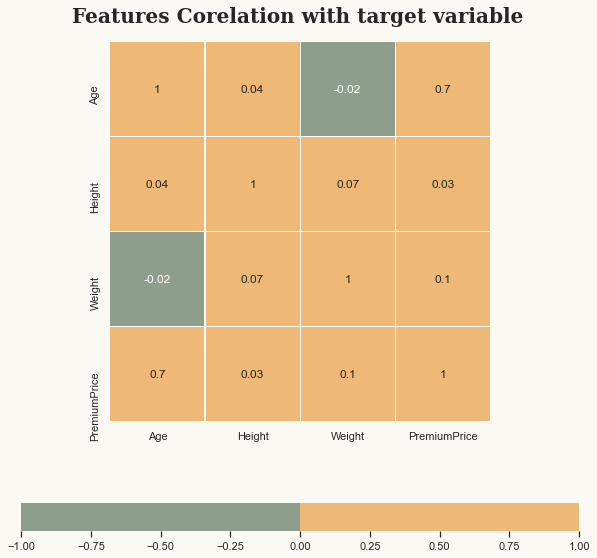

In [12]:
fig = plt.figure(figsize = (10, 10))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])


background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color
_ = ax0.set_facecolor(background_color) # axes background color

ax0.text(-0.4, -0.2, 'Features Corelation with target variable',  fontsize=20, fontweight='bold', fontfamily='serif')


sns.heatmap(data[['Age', 'Height', 'Weight', target]].corr(), ax=ax0, linewidths=.1, vmin=-1, vmax=1, annot=True, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=True, cmap=["#8d9e8c", "#eeb977"], fmt='.1g', )

<a id = '6.2'></a>
### 6.2 Distribution of Target w.r.t. Categorical Variables

**Boxplots**

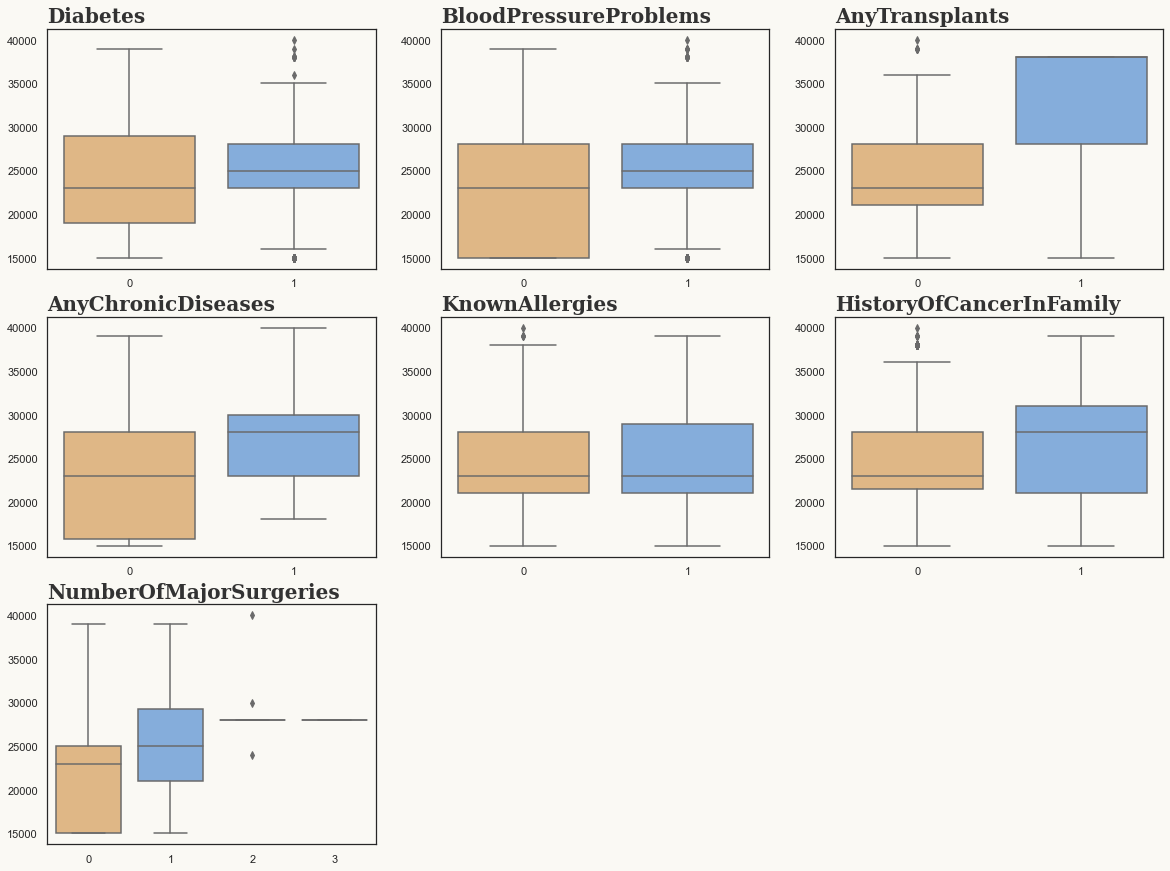

In [13]:
color_palette = ["#eeb977","#8d9e8c"]

fig = plt.figure(figsize = (20, 15))
gs = fig.add_gridspec(3, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color
ax7.set_facecolor(background_color) # axes background color
ax8.set_facecolor(background_color) # axes background color


for s in ['right', 'top', 'bottom', 'left']:
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

ax7.get_xaxis().set_visible(False)
ax7.get_yaxis().set_visible(False)
ax8.get_xaxis().set_visible(False)
ax8.get_yaxis().set_visible(False)

axis = { 'Diabetes' : [ax0],
         'BloodPressureProblems' : [ax1],
         'AnyTransplants' : [ax2],
         'AnyChronicDiseases' : [ax3],
         'KnownAllergies' : [ax4],
         'HistoryOfCancerInFamily' : [ax5],
         'NumberOfMajorSurgeries' : [ax6]
       }

for col in axis.keys():
    if col == 'NumberOfMajorSurgeries':
        sns.boxplot(data = data, x = col, y = target, ax = axis[col][0], palette=["#eeb977","#77ace9", "#f5b4c0", "#c1c1c1"])
    else:
        sns.boxplot(data = data, x = col, y = target, ax = axis[col][0], palette= ["#eeb977","#77ace9"])
    axis[col][0].set_ylabel('')
    axis[col][0].set_xlabel('')
    
_ = ax0.text(-0.5,42000, 'Diabetes', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax1.text(-0.5, 42000, 'BloodPressureProblems', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax2.text(-0.5, 42000, 'AnyTransplants', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax3.text(-0.5, 42000, 'AnyChronicDiseases', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax4.text(-0.5, 42000, 'KnownAllergies', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax5.text(-0.5, 42000, 'HistoryOfCancerInFamily', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax6.text(-0.5, 42000, 'NumberOfMajorSurgeries', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')

# _ = plt.title('Distribution of Categorical Variables',fontsize=30, y = 8.5, x = -1.2, fontweight='bold', fontfamily='serif', color="#323232")

**stripplots**

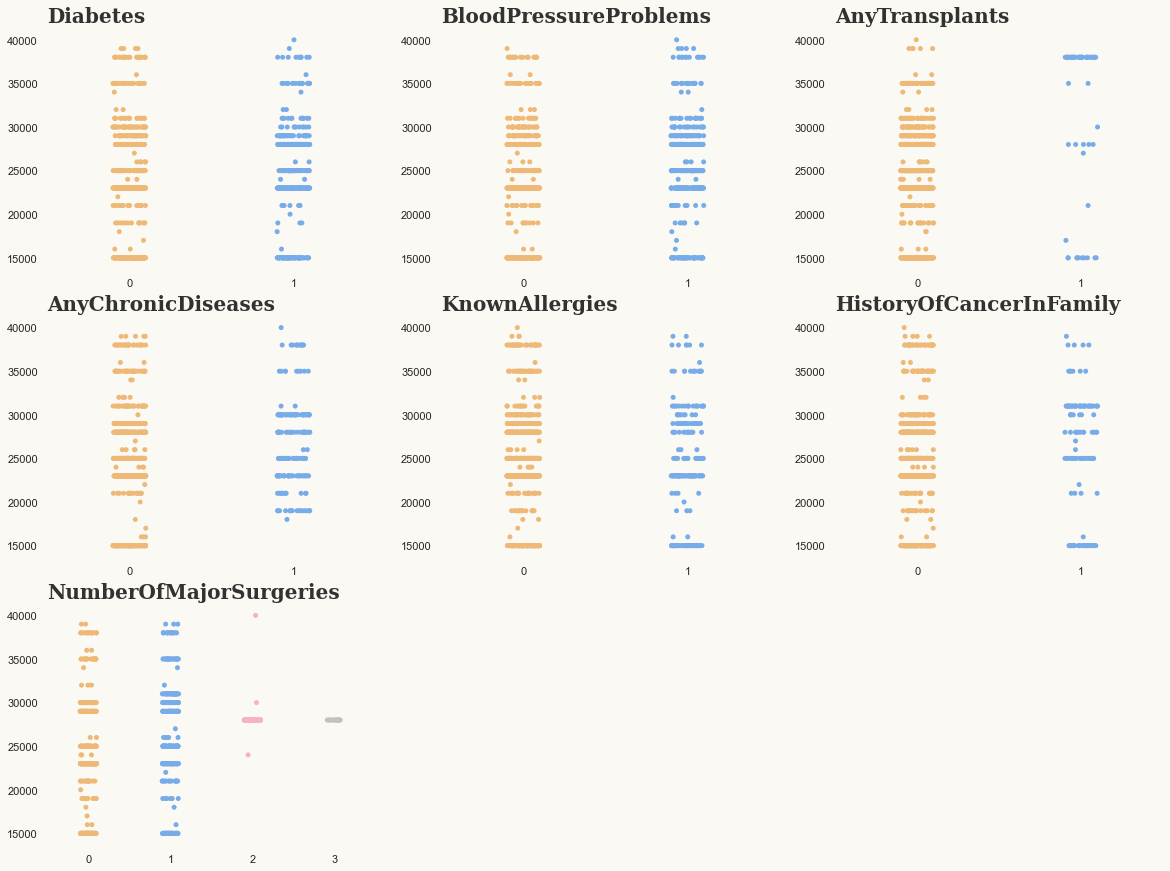

In [14]:
color_palette = ["#eeb977","#8d9e8c"]

fig = plt.figure(figsize = (20, 15))
gs = fig.add_gridspec(3, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color
ax7.set_facecolor(background_color) # axes background color
ax8.set_facecolor(background_color) # axes background color


for s in ['right', 'top', 'bottom', 'left']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

ax7.get_xaxis().set_visible(False)
ax7.get_yaxis().set_visible(False)
ax8.get_xaxis().set_visible(False)
ax8.get_yaxis().set_visible(False)

axis = { 'Diabetes' : [ax0],
         'BloodPressureProblems' : [ax1],
         'AnyTransplants' : [ax2],
         'AnyChronicDiseases' : [ax3],
         'KnownAllergies' : [ax4],
         'HistoryOfCancerInFamily' : [ax5],
         'NumberOfMajorSurgeries' : [ax6]
       }

for col in axis.keys():
    if col == 'NumberOfMajorSurgeries':
        sns.stripplot(data = data, x = col, y = target, ax = axis[col][0], palette=["#eeb977","#77ace9", "#f5b4c0", "#c1c1c1"])
    else:
        sns.stripplot(data = data, x = col, y = target, ax = axis[col][0], palette= ["#eeb977","#77ace9"])
    axis[col][0].set_ylabel('')
    axis[col][0].set_xlabel('')
    
_ = ax0.text(-0.5,42000, 'Diabetes', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax1.text(-0.5, 42000, 'BloodPressureProblems', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax2.text(-0.5, 42000, 'AnyTransplants', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax3.text(-0.5, 42000, 'AnyChronicDiseases', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax4.text(-0.5, 42000, 'KnownAllergies', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax5.text(-0.5, 42000, 'HistoryOfCancerInFamily', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax6.text(-0.5, 42000, 'NumberOfMajorSurgeries', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')

# _ = plt.title('Distribution of Categorical Variables',fontsize=30, y = 8.5, x = -1.2, fontweight='bold', fontfamily='serif', color="#323232")

<a id = 6.3></a>
### 6.3 Popular Premiums w.r.t. Different Health Conditions

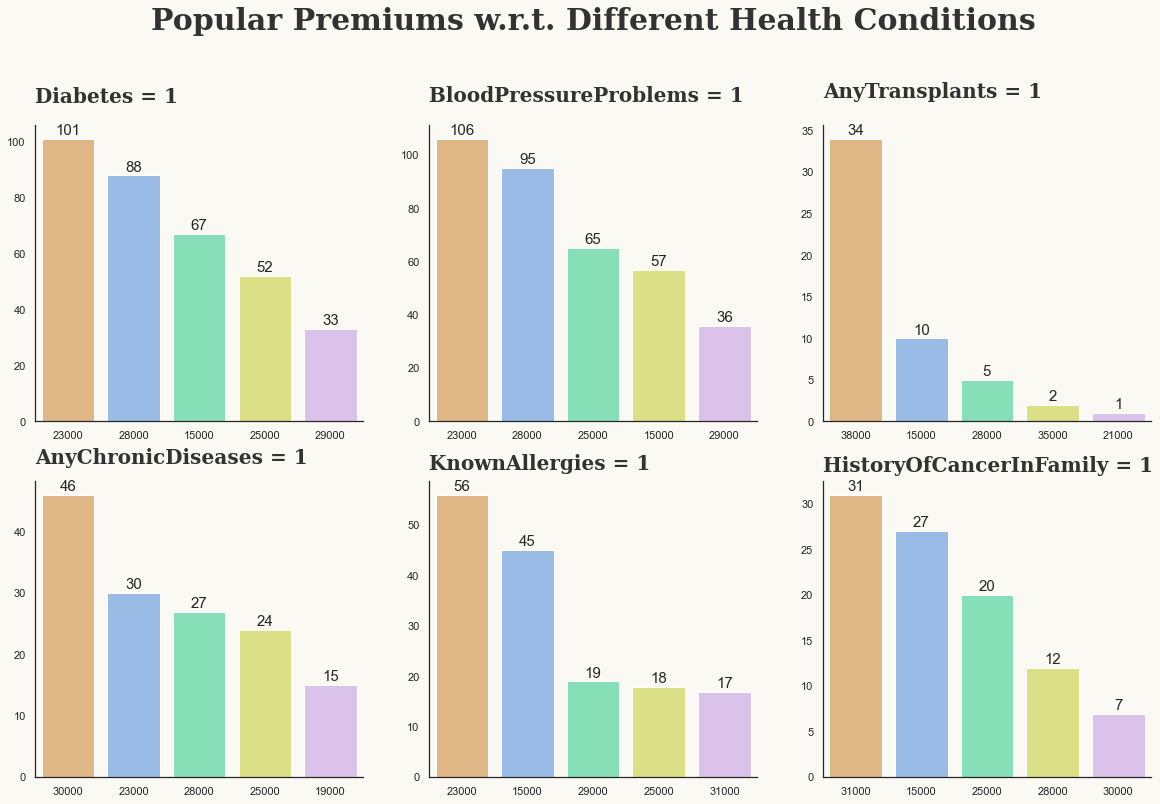

In [15]:
color_palette = ["#eeb977","#8ebaf1", "#77eeb9", "#e8ee77", '#dcbbf1']
fig = plt.figure(figsize = (20, 12))
gs = fig.add_gridspec(2, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color


for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)


axis = { 'Diabetes' : [ax0],
         'BloodPressureProblems' : [ax1],
         'AnyTransplants' : [ax2],
         'AnyChronicDiseases' : [ax3],
         'KnownAllergies' : [ax4],
         'HistoryOfCancerInFamily' : [ax5]
       }


for col in axis.keys():
    sns.countplot(data[data[col] == 1][target],  ax = axis[col][0], palette=color_palette, order = data[ data[col] == 1][target].value_counts().index[:5])
    axis[col][0].set_ylabel('')
    axis[col][0].set_xlabel('')
    
    temp = pd.DataFrame(data[col].value_counts())
    temp = temp.reset_index(drop=False)
    temp.columns = ['Number', 'Count']
    
    for p in axis[col][0].patches:
        percentage = f'{p.get_height()}\n'
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        axis[col][0].text(x, y, percentage, ha='center', va='center', fontsize = 15)
_ = ax0.text(-0.5, 114, 'Diabetes = 1', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax1.text(-0.5, 120, 'BloodPressureProblems = 1', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax2.text(-0.5, 39, 'AnyTransplants = 1', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax3.text(-0.5, 51, 'AnyChronicDiseases = 1', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax4.text(-0.5, 61, 'KnownAllergies = 1', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax5.text(-0.5, 33.5, 'HistoryOfCancerInFamily = 1', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')

_ = plt.title('Popular Premiums w.r.t. Different Health Conditions',fontsize=30, y = 2.5, x = -0.7, fontweight='bold', fontfamily='serif', color="#323232")

<a id = '6.4'></a>
### 6.4 Observations From Bivariate Analysis

**Continuous**
- It is difficult to spot a linear relationship between `Age` and `Premium_Price` at first glance but, if we observe carefully, we can see that as the Age is increasing there are more people with higher Premium_Price. 
- `Height` and `Weight` don't have any linear relationship with the Target.
- `Age` has high `positive correlation` with `Premium_Price`.

**Categorical**
- Users with `Diabetes, BloodPressure Problems, Chronic Disease or Major Surgeries` have a slightly `higher median` value of Premium_Price. 
- Users with `cancer history` in the family have a relatively `higher median` value of Premium_Price.
- Most of the users with any `transplants` are likely to have higher Premium_Price. i.e. `38000`.
- Users who had `more than 1 major surgery` are likely to have Premium_Price of `28000`. 132 out of 135. This PremiumPrice is only for those who have more than 1 major surgery.
- Premiums of `23000` and `28000` are popular in users who have `Diabetes` or `Blood Pressure Problems`. 
- Premium of `30000` is popular among the users who have any `Chronic` disease.

---
<a id = '7'></a>
# 7. Hypothesis Testing with Feature Engineering

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

**1. Older users will have higher Premium_Price.**

**Ans:** Yes. As we can see in the graph below, the median Premium Price is increasing as age is increasing. Also, the lower bound of the boxplot is also getting closer to the median which shows that Older users have higher PremiumPrice.

In [16]:
# Creating a bin feature for Age

def age_bins(x):
    """
    Docstring: Returns the bins for Age.
    
    Parameters:
    ---------
            x: User's Age
    """
    if x <= 20:
        return 1
    if x <= 30:
        return 2
    if x <= 40:
        return 3
    if x <= 50:
        return 4
    if x <60:
        return 5
    return 6

data['Age_Bins'] = data['Age'].apply(lambda x: age_bins(x))

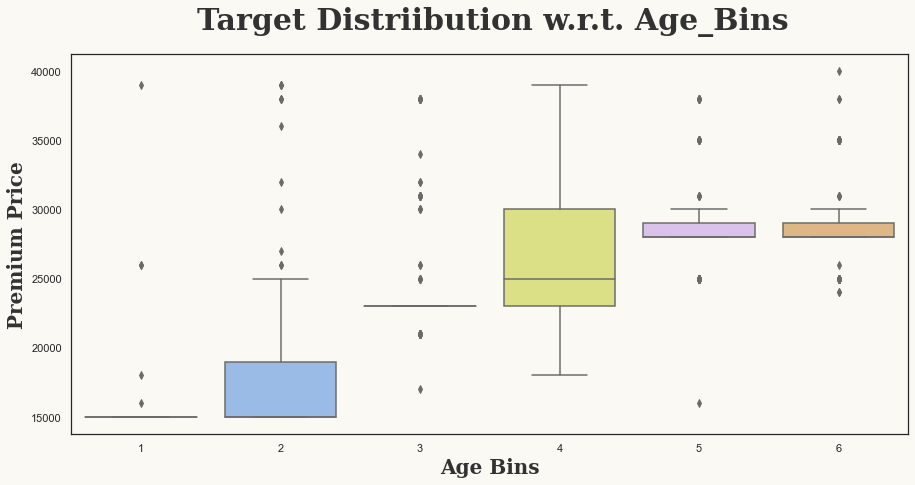

In [17]:
color_palette = ["#eeb977","#8ebaf1", "#77eeb9", "#e8ee77", '#dcbbf1']

fig = plt.figure(figsize = (15, 7))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color



sns.boxplot(data = data, y = target,x = 'Age_Bins', ax = ax0, palette=color_palette)
ax0.set_ylabel('Premium Price', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
ax0.set_xlabel('Age Bins', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')

_ = ax0.text(0.4, 43000, 'Target Distriibution w.r.t. Age_Bins', fontsize = 30, fontweight='bold', fontfamily='serif', color='#323232')


**2. Users with any health condition will have higher PremiumPrice.**

**Ans:**
Yes, but the user knowing that he has any Allergy does not have effects on the Premium_Price. As we can see in the graph below, besides Allergy, users with any health condition have higher median PremiumPrice. Especially, users with Transplants and chronic diseases have very high lower bound and median Premium Prices.


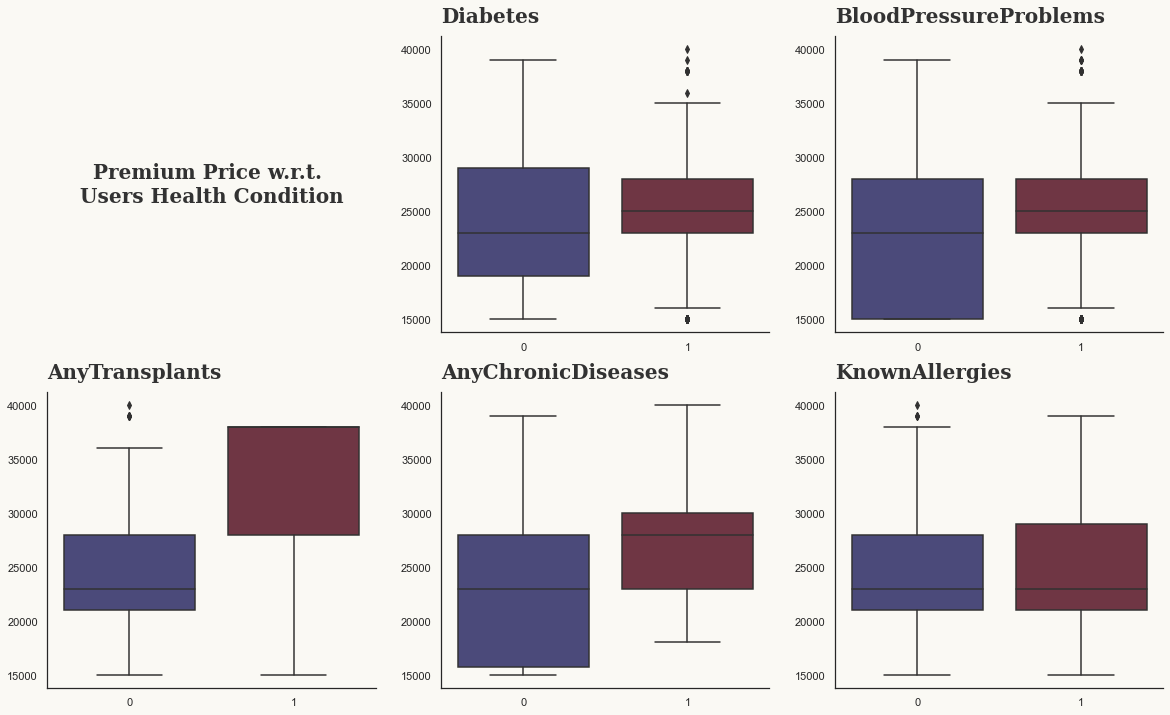

In [18]:
color_palette = ["#eeb977","#8d9e8c"]

fig = plt.figure(figsize = (20, 12))
gs = fig.add_gridspec(2, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color

ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, 'Premium Price w.r.t. \nUsers Health Condition', horizontalalignment='center', verticalalignment='center',
         fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")

for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)


axis = { 'Diabetes' : [ax1],
         'BloodPressureProblems' : [ax2],
         'AnyTransplants' : [ax3],
         'AnyChronicDiseases' : [ax4],
         'KnownAllergies' : [ax5],
         'HistoryOfCancerInFamily' : [ax6]
       }


for col in axis.keys():
    sns.boxplot(data=data, x=col, y=target,  ax = axis[col][0], palette='icefire')
    axis[col][0].set_ylabel('')
    axis[col][0].set_xlabel('')


_ = ax1.text(-0.5, 42500, 'Diabetes', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax2.text(-0.5, 42500, 'BloodPressureProblems', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax3.text(-0.5, 42500, 'AnyTransplants', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax4.text(-0.5, 42500, 'AnyChronicDiseases', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax5.text(-0.5, 42500, 'KnownAllergies', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')

**3. More the number of health conditions, more the PremiumPrice.**

**ANS:**
Yes. The graph below shows that, as the count of user's health conditions is increasing, The median Premium Price is also increasing. Except for the outlier(User with 5 health conditions). 

In [19]:
# Creating Feature for User's health conditions count
    # We will not consider KnownAllergies as a health condition. We've seen that it does not have any effect on the PremiumPrice.
def health_condition_count(x):
    """
    Dockstring:
            Return the number of health conditions user have.
            
    parameter:
    ----------
            x: Row of the dataset
    """
    count = 0
    if x['Diabetes'] == 1:
        count+=1
    if x['BloodPressureProblems'] == 1:
        count+=1
    if x['AnyTransplants'] == 1:
        count+=1
    if x['AnyChronicDiseases'] == 1:
        count+=1
    if x['NumberOfMajorSurgeries'] in [1, 2, 3]:
        count+=1
    return count

data['health_condition_count'] = data.apply(lambda x: health_condition_count(x), axis = 1)

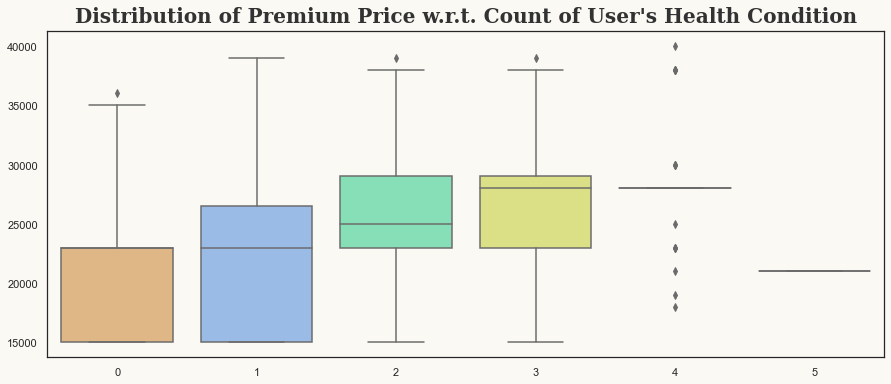

In [20]:
color_palette = ["#eeb977","#8ebaf1", "#77eeb9", "#e8ee77", '#dcbbf1']

fig = plt.figure(figsize = (15, 6))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color

sns.boxplot(data=data, x='health_condition_count', y=target,  ax = ax0, palette=color_palette)
ax0.set_ylabel('')
ax0.set_xlabel('')

_ = ax0.text(-0.3, 42000, "Distribution of Premium Price w.r.t. Count of User's Health Condition", fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')

**4. Users with lower or higher BMI will have higher PremiumPrice.**

**ANS:**
No. Data does not show enough evidance to prove our hypothesis. Furthermore, the Median PremiumPrice of Users with bad BMI is lower.

In [21]:
# Creating BMI Feature

def BMI(x):
    """
    Dockstring:
            return the BMI.
            
    parameters
    ----------
            x: row of the dataset.
    """
    # First we have to convert the Height from centimeters to meter.
    height = x['Height']/100
    bmi = x['Weight']/(height**2)
    return bmi

data['BMI'] = data.apply(lambda x: BMI(x), axis = 1)

# Creating Feature to check if user's BMI is good or not.
data['Is_Good_BMI'] = data['BMI'].apply(lambda x: 1 if (18.5<x) and (x < 24.9) else 0)

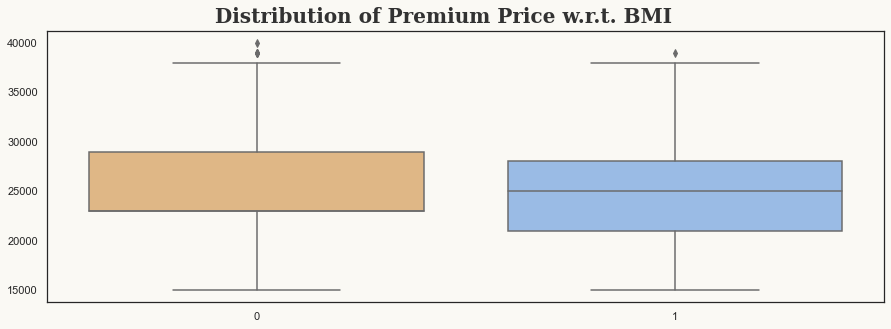

In [22]:
color_palette = ["#eeb977","#8ebaf1"]

fig = plt.figure(figsize = (15, 5))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color

sns.boxplot(data=data, x='Is_Good_BMI', y=target,  ax = ax0, palette=color_palette)
ax0.set_ylabel('')
ax0.set_xlabel('')

_ = ax0.text(-0.1, 42000, "Distribution of Premium Price w.r.t. BMI", fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')

---
<a id='8'></a>
# 8. Conclusion From Data Analysis

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

#### Age
- Age is the only continuous variable that is correlated with PremiumPrice.
- Median PremiumPrice is also increasing as Age increases. 

#### AnyTransplants
- Most of the users with transplants are likely to have 38000 Premium_Price.
- Also, the median PremiumPrice is also very high when the users have transplants. 

#### AnyChronic Diseases
- Users with chronic diseases are likely to have high PremiumPrice.
- Also, Users who have chronic disease tend to have PremiumPrice of 30000. 

#### HistoryOfCancerInFamily
- Users who have a history of cancer in their family, are more likely to have PremiumPrice of 31000. 
- Users with a history of cancer in the family always have a health condition, which makes them more likely to have higher PremiumPrice.

#### NumberOfMajorSurgeries
- Users who have more than 1 major surgery are likely to have Premium_Price of 28000(132 out of 135). This PremiumPrice is only for those who have more than 1 major surgery.

#### BloodPressureProblems
- Users with Blood Pressure Problems are likely to have PremiumPrice in between 23000 and 28000.

**These are the factors that have individually different effects on the target variable(PremiumPrice).**

---
<a id = '9'></a>
# 9. Machine Learning

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

Here, we will try to describe the relationship between Independent(Features) and Dependent(Target) Variable using Machine Learning Modeling.

**Since we have done some changes to the dataset, we will read it again**

In [23]:
data = pd.read_csv(r"C:\Users\sunil\Downloads\Medicalpremium.xls")

<a id = 9.1></a>
## 9.1 Data Preprocessing

**Since all the columns in the data are of integer data type, we don't need to encode them. We will just change the datatype of the columns to save the memory.**

In [24]:
# Cahnging the datatype of Variables.
int8_cols = ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
            'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

int16_cols = ['Height', 'Weight']

int32_cols = ['PremiumPrice']

data[int8_cols] = data[int8_cols].astype('int8')
data[int16_cols] = data[int16_cols].astype('int16')
data[int32_cols] = data[int32_cols].astype('int32')

# With this datatype conversion we've reduced the size of the data from 84.9 KB to 15.5 KB

In [25]:
# Preparing Data For Machine Learning Modeling

target = 'PremiumPrice'
features = [col for col in data.columns if col not in [target]]

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size = 0.3, random_state=1999)

<a id = '9.2'></a>
## 9.2 Baseline Model Building

**Evaluation Metrics:**
**Selecting the Evaluation Metrics is a crucial step. We will use `Root Mean Squared Error` since it punishes large errors. Also, we will use `R-squared`, This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.**

**Now, we will check the performance of different machine learning models on the dataset. We will use all the models without tuning any parameter**

In [26]:
model_dict = {}

seed = 1999

model_dict['Linear Regression'] = LinearRegression()
model_dict['DecisionTree Regressor'] = DecisionTreeRegressor(random_state = seed)
model_dict['Random Forest Regressor'] = RandomForestRegressor(random_state = seed)
model_dict['LGBM Regressor'] = LGBMRegressor()
model_dict['XGB Regressor'] = XGBRegressor(random_state = seed)
model_dict['Catboost Regressor'] = CatBoostRegressor(random_state = seed, verbose=False)


In [27]:
def model_evaluation(X_train, X_test, y_train, y_test, model, model_name):
    """
    Dockstring:
            Shows the score of ML Model by training and evaluating it.
            
    Parameters:
    -----------
            X_train: Training Data for ML Model
            
            X_test: Validation Data for ML Model
            
            y_train: Target values of training data
            
            y_test:  Target values of validation data
            
            model: Machine Learning Model
            
            model_name: Name of Machine Learning Model
    """
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print('======================================{}======================================='.format(model_name))
    print()
    print('RMSE is : {}'.format(RMSE))
    print('R2_Score is: {}'.format(r2))
    print()

In [28]:
for model_name,model in model_dict.items():
    model_evaluation(X_train, X_test, y_train, y_test, model, model_name)

======================================Linear Regression=======================================

RMSE is : 3827.2811797779873
R2_Score is: 0.6164173167374062

======================================DecisionTree Regressor=======================================

RMSE is : 3665.028298994761
R2_Score is: 0.6482509623891161

======================================Random Forest Regressor=======================================

RMSE is : 2939.9249622709394
R2_Score is: 0.7736655070176697

======================================LGBM Regressor=======================================

RMSE is : 2906.7284253255034
R2_Score is: 0.778748018655057

======================================XGB Regressor=======================================

RMSE is : 3174.6151171661945
R2_Score is: 0.7360872250466999

======================================Catboost Regressor=======================================

RMSE is : 3001.4342041137716
R2_Score is: 0.7640956723612682



<a id = 9.3></a>
## 9.3 Setting up a Cross-Validation Strategy

**Why Cross-Validation** : Cross-validation is a statistical method used to estimate the performance of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. 
Also, with train_test_split we cannot evaluate our model against the entire dataset. But with the help of Cross-Validation we can evaluate our model on the  entire dataset.

**Here, We will use K-Fold Cross Validation with 5 splits**

**We will validate the tree-based models which gives us the feature importances and finally we will combine them**

In [29]:
def cross_val(regressor, train, features, name, x, y):
    """
    Docstring: Returns the predicted values and feature importances and shows the performance of the ML Model. 
    
    Parameters
    ----------
        regressor: Machine Learning Model
        
        train: Dataset to evaluate ML Model
        
        features: Independent Variables in the Dataset
        
        name: name of ML Model
        
        x: X-Coordinate for text of the plot
        
        y: Y-Coordinate for text of the plot
    """
    N_splits = 5
    
    oofs = np.zeros(len(train))
    
    feature_importances = pd.DataFrame()
    
    target_col = train[target]
    
    folds = KFold(n_splits = N_splits, shuffle = True,random_state = 1999)
    for index, (trn_idx, val_idx) in enumerate(folds.split(train)):
        print(f'\n================================Fold{index + 1}===================================')
        
        #### Train Set
        X_trn, y_trn = train[features].iloc[trn_idx], train[target].iloc[trn_idx]
        
        #### Validation Set
        X_val, y_val = train[features].iloc[val_idx], train[target].iloc[val_idx]
        
        ############ Fitting #############
        _ = regressor.fit(X_trn, y_trn)
        
        ############ Predicting #############
        val_preds = np.abs(regressor.predict(X_val))
        test_preds = np.abs(regressor.predict(X_test))
        
        error = np.sqrt(mean_squared_error(y_val, val_preds))
        r2 = r2_score(y_val, val_preds)
        print(f'\n Root Log Mean Squared Error for Validation set is : {error}')
        print(f'R2 Score for Validation set is : {error}')
        
        oofs[val_idx] = val_preds
        
        ############ Collecting Feature Importances for fold ############
        fold_importances = pd.DataFrame({'fold' : index+1, 'feature' : features, 'importance' : regressor.feature_importances_})
        feature_importances = pd.concat([feature_importances, fold_importances], axis = 0)
    total_error = np.sqrt(mean_squared_error(target_col, oofs))
    total_r2 = r2_score(target_col, oofs)
    print(f'\n\Root Log Mean Squared Error for oofs is {total_error}')
    print(f'\n\R2 Score for oofs is {total_r2}')
    
    # ========== Plotting Feature Importances 
    fig = plt.figure(figsize = (12, 6))
    gs = fig.add_gridspec(1, 1)

    ax0 = fig.add_subplot(gs[0, 0])

    background_color = "#faf9f4"
    fig.patch.set_facecolor(background_color) # figure background color

    ax0.set_facecolor(background_color) # axes background color
    
    feature_importances = feature_importances.reset_index(drop=True)
    fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending=False)[:20][::-1]
    fi.plot(kind = 'barh', color = "#eeb977", ax = ax0)
    ax0.text(x, y, f'Feature Importance of {name} Model', horizontalalignment='center', verticalalignment='center',
         fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
    
    return oofs, fi

<a id = '9.4'></a>
## 9.4 Validating ML Models

**We will not try to hyperparameter tune or create features for model building purposes. Our goal is not to build a model to predict Premium of users but to find out the factors that have a significant effect on determining the premium of the User.**

In [30]:
rf = RandomForestRegressor(random_state=seed)
lgb = LGBMRegressor(random_state=seed)
xgb = XGBRegressor(random_state = seed)
cat = CatBoostRegressor(random_state=seed, verbose = False)

**1. Random Forest**


================================Fold1===================================

 Root Log Mean Squared Error for Validation set is : 3306.044815672093
R2 Score for Validation set is : 3306.044815672093

================================Fold2===================================

 Root Log Mean Squared Error for Validation set is : 2190.2587752450786
R2 Score for Validation set is : 2190.2587752450786

================================Fold3===================================

 Root Log Mean Squared Error for Validation set is : 2155.9948296746347
R2 Score for Validation set is : 2155.9948296746347

================================Fold4===================================

 Root Log Mean Squared Error for Validation set is : 2644.4849229319143
R2 Score for Validation set is : 2644.4849229319143

================================Fold5===================================

 Root Log Mean Squared Error for Validation set is : 3572.2458774749894
R2 Score for Validation set is : 3572.2458774749894

\Root 

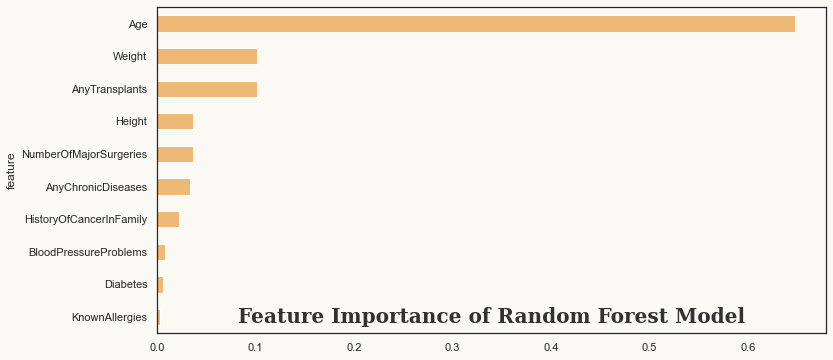

In [31]:
rf_oofs, rf_fi = cross_val(rf, data, features, 'Random Forest', 0.34, 0)

**2. Light GBM**


================================Fold1===================================

 Root Log Mean Squared Error for Validation set is : 3268.009582778408
R2 Score for Validation set is : 3268.009582778408

================================Fold2===================================

 Root Log Mean Squared Error for Validation set is : 2414.4113558841955
R2 Score for Validation set is : 2414.4113558841955

================================Fold3===================================

 Root Log Mean Squared Error for Validation set is : 2215.2727325065684
R2 Score for Validation set is : 2215.2727325065684

================================Fold4===================================

 Root Log Mean Squared Error for Validation set is : 2863.623373576129
R2 Score for Validation set is : 2863.623373576129

================================Fold5===================================

 Root Log Mean Squared Error for Validation set is : 3589.054852018086
R2 Score for Validation set is : 3589.054852018086

\Root Log 

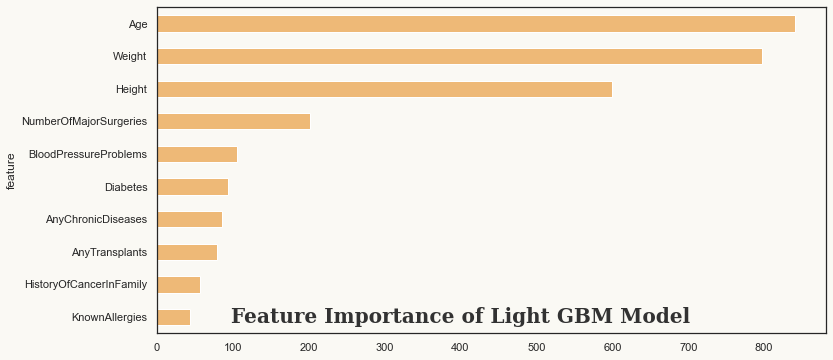

In [32]:
lgb_oofs, lgb_fi = cross_val(lgb, data, features, "Light GBM", 400, 0)

**3. XGBoost**


================================Fold1===================================

 Root Log Mean Squared Error for Validation set is : 3832.36648086315
R2 Score for Validation set is : 3832.36648086315

================================Fold2===================================

 Root Log Mean Squared Error for Validation set is : 2758.5315638923234
R2 Score for Validation set is : 2758.5315638923234

================================Fold3===================================

 Root Log Mean Squared Error for Validation set is : 2752.683304691636
R2 Score for Validation set is : 2752.683304691636

================================Fold4===================================

 Root Log Mean Squared Error for Validation set is : 3102.7928822937693
R2 Score for Validation set is : 3102.7928822937693

================================Fold5===================================

 Root Log Mean Squared Error for Validation set is : 3810.4137277529762
R2 Score for Validation set is : 3810.4137277529762

\Root Log 

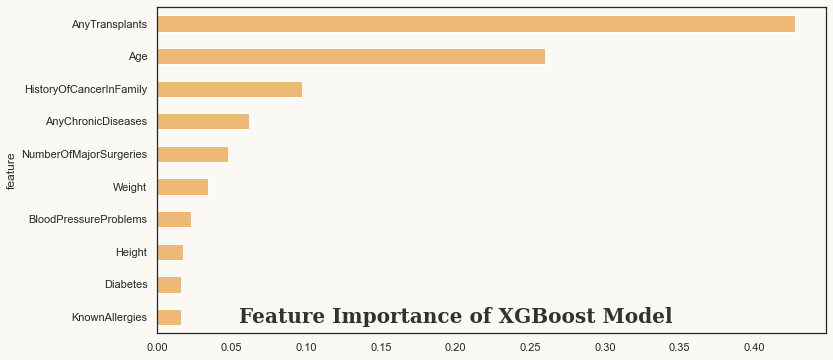

In [33]:
xgb_oofs, xgb_fi = cross_val(xgb, data, features, 'XGBoost', 0.2, 0)

**4. CatBoost**


================================Fold1===================================

 Root Log Mean Squared Error for Validation set is : 3338.7366494979265
R2 Score for Validation set is : 3338.7366494979265

================================Fold2===================================

 Root Log Mean Squared Error for Validation set is : 2523.7077140202537
R2 Score for Validation set is : 2523.7077140202537

================================Fold3===================================

 Root Log Mean Squared Error for Validation set is : 2406.8795170383573
R2 Score for Validation set is : 2406.8795170383573

================================Fold4===================================

 Root Log Mean Squared Error for Validation set is : 2800.6050969090757
R2 Score for Validation set is : 2800.6050969090757

================================Fold5===================================

 Root Log Mean Squared Error for Validation set is : 3569.7619733709207
R2 Score for Validation set is : 3569.7619733709207

\Roo

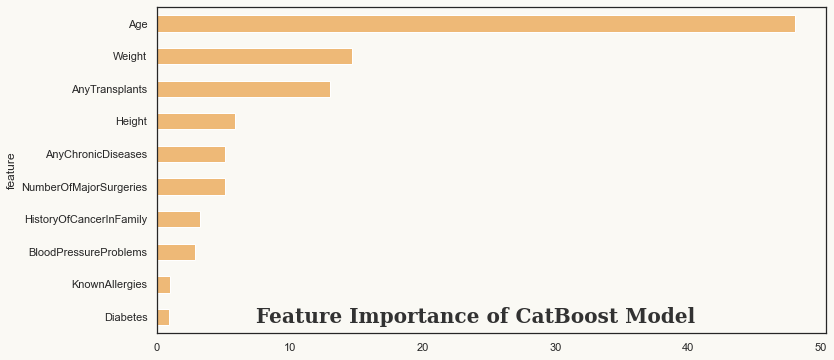

In [34]:
cat_oofs, cat_fi = cross_val(cat, data, features, 'CatBoost', 24, 0)

<a id = 9.5></a>
## 9.5 Aggregating Feature Importances of All ML Models.

**As we can see different models have different importances of features. Now we will combine Feature_Importances of all the models and visualize them.**

**Also, When it comes to determining feature importances, models have their own scales for doing it. So, we will scale the importance of all models before combining them and then we will visualize them.**

In [35]:
# Creating the Dataframe from feature importances of all ML Models.
fi = pd.DataFrame([rf_fi, lgb_fi, xgb_fi, cat_fi]).T
fi.columns = ['rf_fi', 'lgb_fi', 'xgb_fi', 'cat_fi']

# Scaling the Importances
fi['rf_fi'] = fi['rf_fi']*100
fi['xgb_fi'] = fi['xgb_fi']*100

lgb_sum = sum(fi['lgb_fi'])
fi['lgb_fi'] = fi['lgb_fi'].apply(lambda x: (x/lgb_sum) *100)

# Averaging The Feature Importances From All Models And Scaling Them.
fi['Overall_Importance'] = fi['rf_fi'] + fi['lgb_fi'] + fi['xgb_fi'] + fi['cat_fi']
over_sum = sum(fi['Overall_Importance'])
fi['Overall_Importance'] = fi['Overall_Importance'].apply(lambda x: (x/over_sum)*100)

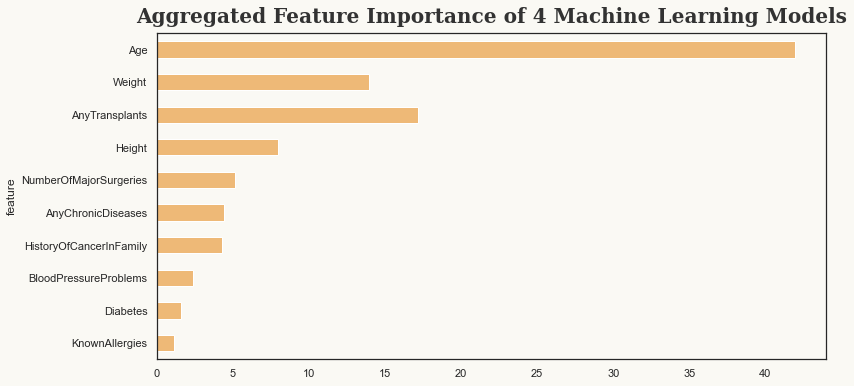

In [36]:
fig = plt.figure(figsize = (12, 6))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color

fi['Overall_Importance'].plot(kind = 'barh', color = "#eeb977", ax = ax0)
_ = ax0.text(22, 10, 'Aggregated Feature Importance of 4 Machine Learning Models', horizontalalignment='center', verticalalignment='center',
         fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")

<a id = 9.6></a>
## 9.6 Conclusion From Machine Learning Modeling

- Machine Learning Algorithms are giving more importance to Numerical Variables than Categorical variables. 
- `Age` has the highest effect when comes to predicting the PremiumPrice with the feature importance of almost 42. 
- `AnyTransplants` have the highest feature importance in categorical variables. 
- In most of the ML models, `Diabetes` and `KnownAllergie` have the lowest importance.
- Other binary Variables have a significant effect on our dependent variable PremiumPrice.
- `NumberOfMajorSurgeries` is also contributing averagely when it comes to predicting the target variable.